# Datasets and Visualizations

## Dataset and visualization

The goal for this notebook is to show you some basic data, define terms of supervised learning, and give you confidence to go out and grab data from the wild world.

## Some Rules of Thumb

1. The first rule of data science:  **LOOK AT YOUR DATA**. 
2. Also, the second rule of data science: **LOOK AT YOUR DATA**

By visualizing the dataset before attempting any machine learning, you will gain valuable intuition about the the dataset which will serve you well when deciding on where to start.

## Popular datasets

The internet is full of datasets, some good, some not so good. Here is a short list of some resources that may help you on your data quests.

1. Housing prices are one of the most popular datasets on Kaggle -- and it's classic. We're going to use the [Ames set](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

2. I also want to point out the [UCI machine learning datasets](https://archive.ics.uci.edu/ml/index.php), which are amazing for ML datasets. Could be valuable for your side projects!

3. [Google's dataset search](https://toolbox.google.com/datasetsearch)

## Let's begin...

We'll start by importing some important packages: **numpy, matplotlib, and pandas.**

In [2]:
%matplotlib inline
import PyQt5
import numpy as np
import matplotlib
import matplotlib.animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

## Dataset Download

Let's download a dataset and have a quick look. We'll be using the Ames Residential Homesale Dataset. You can read more about the dataset here: https://www.openintro.org/stat/data/?data=ames

In [19]:
url="https://www.openintro.org/stat/data/ames.csv"
df=pd.read_csv(url)
df.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Now that we have the data, let's plot it. We'll look at 2 story houses sold in 2010.

0       False
1       False
2       False
3       False
4        True
        ...  
2925    False
2926    False
2927    False
2928    False
2929    False
Length: 2930, dtype: bool


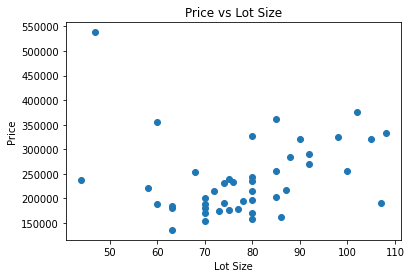

In [20]:
%matplotlib inline
index_2br_2010 = (df["MS.SubClass"] == 60) & (df["Yr.Sold"] == 2010)
price = df['SalePrice'][index_2br_2010]
lot   = df['Lot.Frontage'][index_2br_2010]
bedroom = df['Bedroom.AbvGr'][index_2br_2010]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(lot, price)
plt.xlabel("Lot Size")
plt.ylabel("Price")
plt.title("Price vs Lot Size")
plt.show()

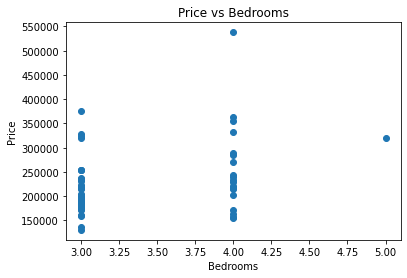

In [4]:
%matplotlib inline
fig = plt.figure()
plt.scatter(bedroom, price)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Price vs Bedrooms")
plt.show()

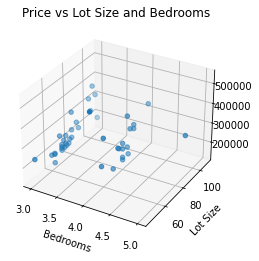

In [5]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bedroom, lot, price)
plt.title('Price vs Lot Size and Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Lot Size')
plt.show(block=True)

Here's an interactive version of the above 3D plot that can be panned and rotated:

In [6]:
%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bedroom, lot, price)
plt.title('Price vs Lot Size and Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Lot Size')
plt.show(block=True)

A much simpler, but still real linear relationship!
---

Here is another dataset, in which we do. Let's look at miles per gallon in the city to Highway Miles per Gallon of old cars. The hypothesis is that there should be a linear relationship, because some cars are just more efficient than others. 

In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df1 = pd.read_csv(url, header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


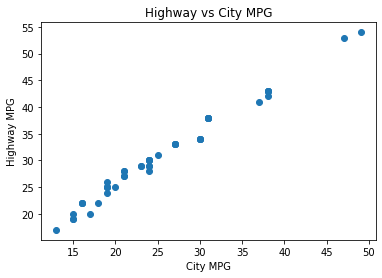

In [8]:
%matplotlib inline
n = 50 # we'll take the first 51 values
d = df1.values
city_mpg, hi_mpg = 23,24 # column numbers for city MPG and highway MPG, respectively
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(d[0:n,city_mpg], d[0:n,hi_mpg])
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.title('Highway vs City MPG')
plt.show()

Now that looks like a line! If we wanted to predict the highway MPG as a function of the city MPG, we could model this relationship using linear regression. That's a topic for the next workshop: **Machine Learning!**

Finally: Working with COVID-19 Data
---

We can extract valuable insights from global COVID-19 data to learn more about the pandemic. This is an essential skill for policy-making and planning, and major governments around the world are analyzing these data to make decisions about potential lockdowns and quarantines.

First, let's fetch the EU's global COVID-19 case distribution database.


In [27]:
url = "https://opendata.ecdc.europa.eu/covid19/casedistribution/csv" # Global COVID-19 case distribution
df2 = pd.read_csv(url)
df2.head() # display the head to check the data makes sense

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,18/07/2020,18,7,2020,219,32,Afghanistan,AF,AFG,38041757.0,Asia,7.794067
1,17/07/2020,17,7,2020,76,21,Afghanistan,AF,AFG,38041757.0,Asia,8.012248
2,16/07/2020,16,7,2020,254,49,Afghanistan,AF,AFG,38041757.0,Asia,8.301404
3,15/07/2020,15,7,2020,285,33,Afghanistan,AF,AFG,38041757.0,Asia,8.472269
4,14/07/2020,14,7,2020,4,2,Afghanistan,AF,AFG,38041757.0,Asia,8.456497


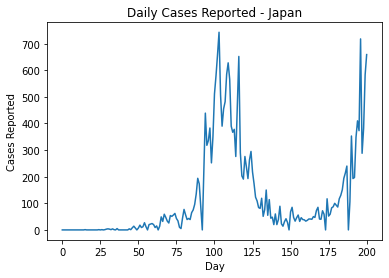

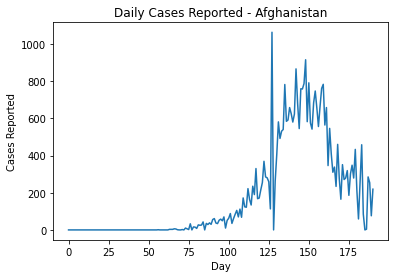

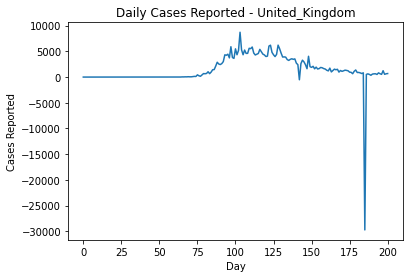

In [91]:
%matplotlib inline

def displayDailyCases(country):
    country_filter = (df2["countriesAndTerritories"] == country) # create a filter to only take rows with country as United_States_of_America
    country_days = df2["dateRep"][country_filter] # get all
    country_cases = df2["cases"][country_filter]
    fig = plt.figure()
    ax = fig.add_subplot();
    ax.plot(country_days, country_cases.iloc[::-1]) # do iloc to reverse
    plt.xlabel('Day')
    plt.xscale('linear') # do this to make ticks visible
    plt.ylabel('Cases Reported')
    plt.title('Daily Cases Reported - ' + country)
    plt.show()

displayDailyCases("Japan")
displayDailyCases("Afghanistan")
displayDailyCases("United_Kingdom")